<a href="https://colab.research.google.com/github/Antonio-Villarreal/Multimodal-Machine-Learning/blob/main/Coding_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antonio Villarreal

# Multimodal Machine Learning - Coding Assignment 1

Importing CSV Files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile

# specify the zip file name
zip_file = '/content/gdrive/MyDrive/coding_assignment_1.zip'

# specify the directory where you want to extract the files
extraction_path = '/content/'

# extract the files
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
articleInfo = '/content/coding_assignment_1/articleInfo.csv'
authorInfo = '/content/coding_assignment_1/authorInfo.csv'
data = '/content/coding_assignment_1/data.csv'

## 1) Python Fundamentals

Merge CSV Files

In [ ]:
import pandas as pd

# Load the two csv files into pandas dataframes
df1 = pd.read_csv(articleInfo)
df2 = pd.read_csv(authorInfo)

# Merge the two dataframes on the "article number" column
merged_df = pd.merge(df1, df2, on="Article No.", how="outer")

# Fill empty cells with 0
merged_df.fillna(0, inplace=True)

# Save the merged dataframe to a new csv file
merged_df.to_csv("/content/coding_assignment_1/merged_file.csv", index=False)

Cleaning Data

In [ ]:
import pandas as pd

# load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/coding_assignment_1/merged_file.csv")

# replace the misspelled country name with the correct spelling
df["Country"] = df["Country"].replace("Denamrk", "Denmark")
df["Country"] = df["Country"].replace("Hong Kong", "China")
df["Country"] = df["Country"].replace("Chian", "China")
df["Country"] = df["Country"].replace("Palastine", "Israel")
df["Country"] = df["Country"].replace("USA", "United States of America")

# save the corrected data to a new CSV file
df.to_csv("/content/coding_assignment_1/mergedInfo_corrected.csv", index=False)

In [ ]:
mergedInfo = "/content/coding_assignment_1/mergedInfo_corrected.csv"

Plot the yearly_publication figure

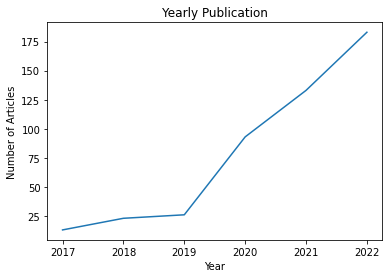

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv(mergedInfo)

# Group the data by year and count the number of articles for each year
yearly_publication = df.groupby("Year").count()

# Plot the data
plt.plot(yearly_publication.index, yearly_publication["Article No."])
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Yearly Publication")
plt.show()

Plot the yearly_citation figure

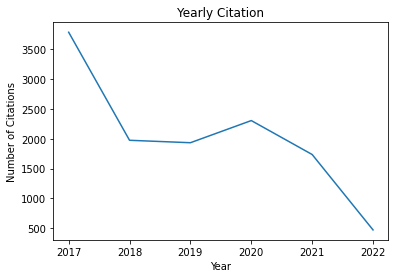

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv(mergedInfo)

# Group the data by year and sum the number of citations for each year
yearly_citation = df.groupby("Year").sum()

# Plot the data
plt.plot(yearly_citation.index, yearly_citation["Citation"])
plt.xlabel("Year")
plt.ylabel("Number of Citations")
plt.title("Yearly Citation")
plt.show()

Plot the figure of the number of publications across countries.

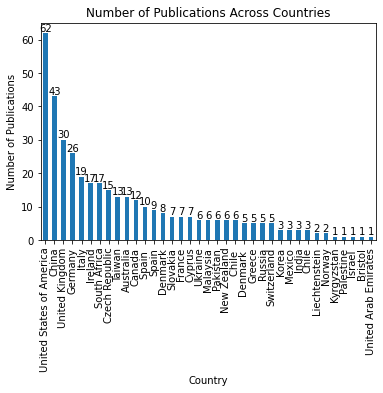

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the CSV file into a pandas DataFrame
df = pd.read_csv(mergedInfo)

# group the data by country and count the number of publications in each country
grouped = df['Country'].value_counts()

# filter out the countries with zero value
grouped = grouped[(grouped != 0) & (grouped.index != '0')]

# plot the data using a bar plot
ax = grouped.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Publications")
plt.title("Number of Publications Across Countries")

# add value labels to each bar
for i, v in enumerate(grouped.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


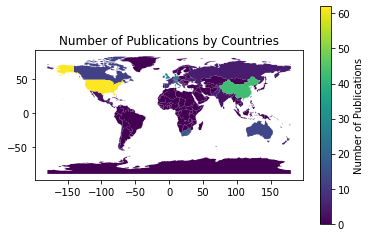

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv(mergedInfo)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
grouped = df.groupby('Country').count()
merged = world.merge(grouped, left_on='name', right_on='Country', how='left')
merged = merged.fillna(0)

# plot the map with a legend
fig, ax = plt.subplots(1,1)
merged.plot(column='Article No.', ax=ax, legend=True, legend_kwds={'label': "Number of Publications"})
ax.set_title("Number of Publications by Countries")
plt.show()

What are the top 5 institutions that have the most published articles in this
area?

In [ ]:
import pandas as pd

# load the CSV file into a pandas DataFrame
df = pd.read_csv(mergedInfo)

# remove rows with zero values
df = df[df['Author Affiliation'] != 0]

# group the data by university and count the number of publications from each university
grouped = df['Author Affiliation'].value_counts()

# print the universities ranked 2nd to 6th in terms of the number of publications
print(grouped.iloc[1:6])


University of the Western Cape    17
Masaryk University                12
University College Cork           11
Intel Corporation                 11
Madigan Army Medical Center        8
Name: Author Affiliation, dtype: int64


Who are the top 5 researchers that have the most h-index in this area?

In [ ]:
import pandas as pd

# load the CSV file into a pandas DataFrame
df = pd.read_csv(mergedInfo)
df2['h-index'] = df2['h-index'].astype('float')

# group the data by researcher and calculate the sum of the h-index for each researcher
grouped = df2.groupby('Author Name').sum()['h-index']

# print the top 5 researchers with the highest h-index
print(grouped.sort_values(ascending=False).head(5))

## DO NOT SUM

Author Name
Ulrich Trautwein         95.0
Nicolas Molinari         63.0
George S. Athwal         59.0
Sellappan Palaniappan    48.0
Maria Luisa Lorusso      33.0
Name: h-index, dtype: float64


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(mergedInfo)

# Sort the rows by the h-index column in descending order
df_sorted = df.sort_values('h-index', ascending=False)

# Extract the top 5 authors from the sorted DataFrame
top_authors = df_sorted[['Author Name', 'h-index']].head(5)

# Print the top 5 authors in a table format
print(top_authors.to_string(index=False))


        Author Name  h-index
   Ulrich Trautwein     95.0
   Nicolas Molinari     63.0
   George S. Athwal     59.0
Vicente A. González     33.0
Maria Luisa Lorusso     33.0


## 2) Regression

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the CSV file into a pandas DataFrame
df = pd.read_csv(data)

# extract the independent variables and dependent variable
X = df[["ASR_Error", "Intent_Error", "Duration", "Gender", "Purchase"]]
y = df["SUS"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict the SUS scores on the test data
y_pred = regressor.predict(X_test)

# calculate the mean squared error
mse = np.mean((y_pred - y_test)**2)

print("Mean Squared Error:", mse)

# fit the regression model to the training data
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# display the summary of the regression model
print(model.summary())


Mean Squared Error: 69.16194762855073
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     20.24
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.13e-12
Time:                        18:18:41   Log-Likelihood:                -291.71
No. Observations:                  80   AIC:                             595.4
Df Residuals:                      74   BIC:                             609.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


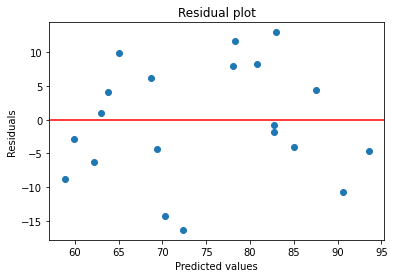

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


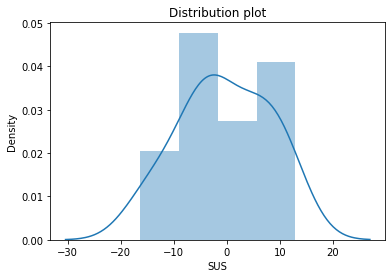

In [ ]:
import seaborn as sns

sns.distplot(residuals)
plt.title('Distribution plot')
plt.show()

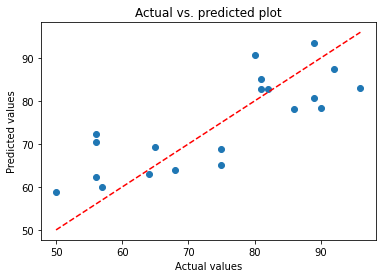

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted plot')
plt.show()

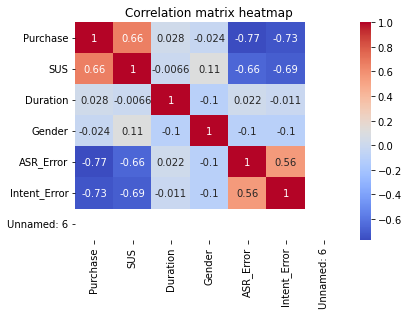

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')
plt.show()

# 3) Classification

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from imblearn.over_sampling import SMOTE

df = pd.read_csv(data)

In [111]:
df.head(5)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN


Version 1

In [112]:
X = df[['ASR_Error', 'Intent_Error', 'Duration', 'Gender']]
y = df['Purchase']

In [113]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [114]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(scaled_X, y, test_size=0.3, random_state=0)

In [115]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_1, y_train_1)
y_pred_logreg_1 = logreg.predict(X_test_1)

# SVM Model
# svm = SVC(kernel= 'poly', max_iter=100)
svm = SVC(probability=True)
svm.fit(X_train_1, y_train_1)
y_pred_svm_1 = svm.predict(X_test_1)

# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train_1, y_train_1)
y_pred_gnb_1 = gnb.predict(X_test_1)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_1, y_train_1)
y_pred_rf_1 = rf.predict(X_test_1)

Version 2

In [116]:
X = df[['ASR_Error', 'Intent_Error', 'Duration', 'Gender']]
y = df['Purchase']

In [117]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [118]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(scaled_X, y, test_size=0.3, random_state=0)
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train_2, y_train_2)

In [119]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(over_sampled_X_train, over_sampled_y_train)
y_pred_logreg_2 = logreg.predict(X_test_2)

# SVM Model
# svm = SVC(kernel= 'poly', max_iter=100)
svm = SVC(probability=True)
svm.fit(over_sampled_X_train, over_sampled_y_train)
y_pred_svm_2 = svm.predict(X_test_2)

# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(over_sampled_X_train, over_sampled_y_train)
y_pred_gnb_2 = gnb.predict(X_test_2)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(over_sampled_X_train, over_sampled_y_train)
y_pred_rf_2 = rf.predict(X_test_2)

Version 3

In [120]:
X = df[['ASR_Error', 'Intent_Error', 'Duration', 'Gender']]
y = df['Purchase']

In [136]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [137]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=0)

In [138]:
# Check the distribution of the target labels
import pandas as pd
import numpy as np

# Combine X_train and y_train into a single DataFrame
df_train = pd.concat([pd.DataFrame(X_train_3), pd.Series(y_train_3)], axis=1)

# Check the target label distribution
print(df_train[y_train_3.name].value_counts())

# Balance the target label distribution using resampling
df_balanced = df_train.groupby(y_train_3.name).apply(lambda x: x.sample(np.max(df_train[y_train_3.name].value_counts()), replace=True))

# Split the balanced data back into X_train and y_train
X_train_3 = df_balanced.iloc[:, :-1].values
y_train_3 = df_balanced.iloc[:, -1].values

# Check the target label distribution again
print(np.unique(y_train_3, return_counts=True))

1    35
0    35
Name: Purchase, dtype: int64
(array([0, 1]), array([35, 35]))


In [140]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_3, y_train_3)
y_pred_logreg_3 = logreg.predict(X_test_3)

# SVM Model
# svm = SVC(kernel= 'poly', max_iter=100)
svm = SVC(probability=True)
svm.fit(X_train_3, y_train_3)
y_pred_svm_3 = svm.predict(X_test_3)

# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train_3, y_train_3)
y_pred_gnb_3 = gnb.predict(X_test_3)

# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train_3)
y_pred_rf_3 = rf.predict(X_test_3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Results

## Version 1

Logistic Regression Statistics:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1-score: 0.9667
Confusion Matrix: 
[[15  1]
 [ 0 14]]



<Figure size 2160x1080 with 0 Axes>

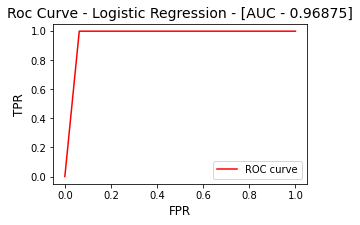

SVM Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

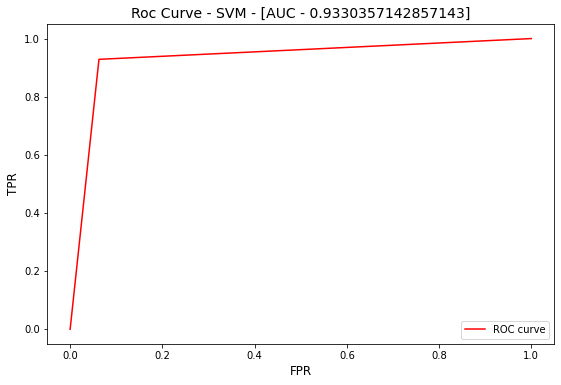

Naive Bayes Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

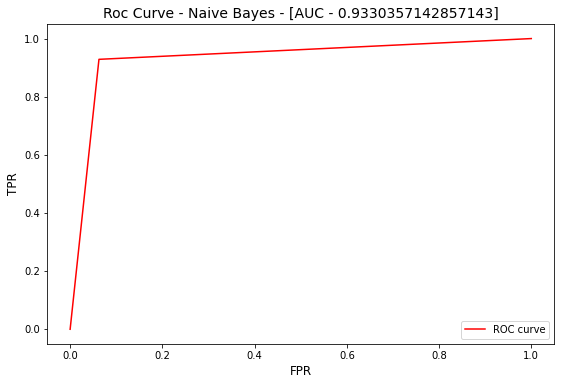

Random Forest Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

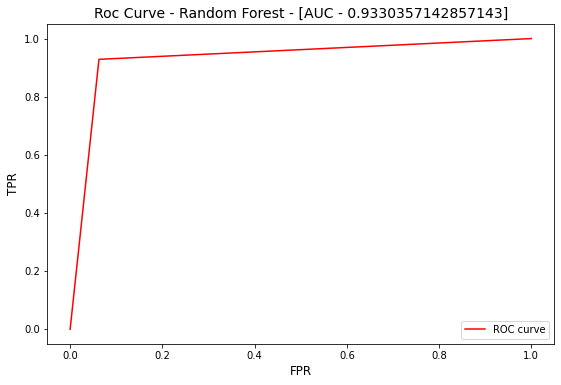

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
y_tests = [y_test_1, y_test_1, y_test_1, y_test_1]
y_preds = [y_pred_logreg_1, y_pred_svm_1, y_pred_gnb_1, y_pred_rf_1]

for model, y_test, y_pred in zip(models, y_tests, y_preds):
    print(f'{model} Statistics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')

          # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(30, 15))
    plt.suptitle("ROC Curves")
    plot_index = 1
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve - {model} - [AUC - {roc_auc}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,20)
    plt.show()

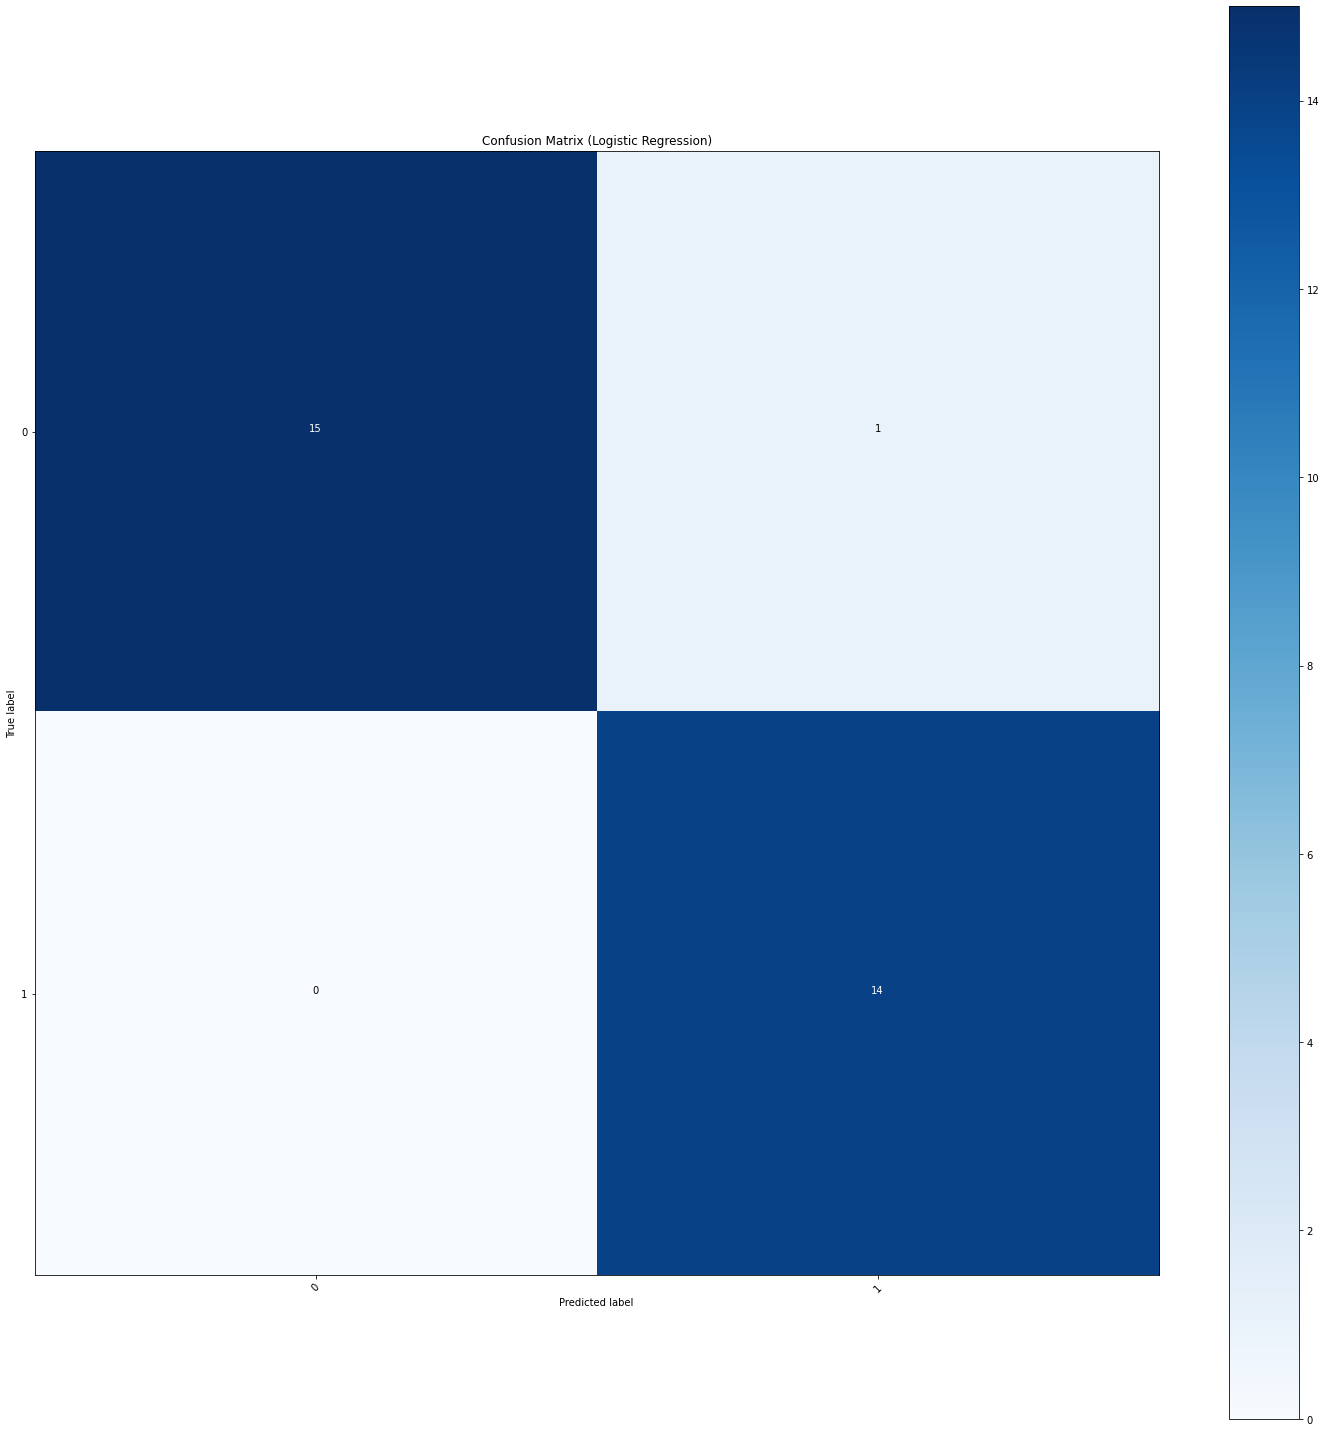

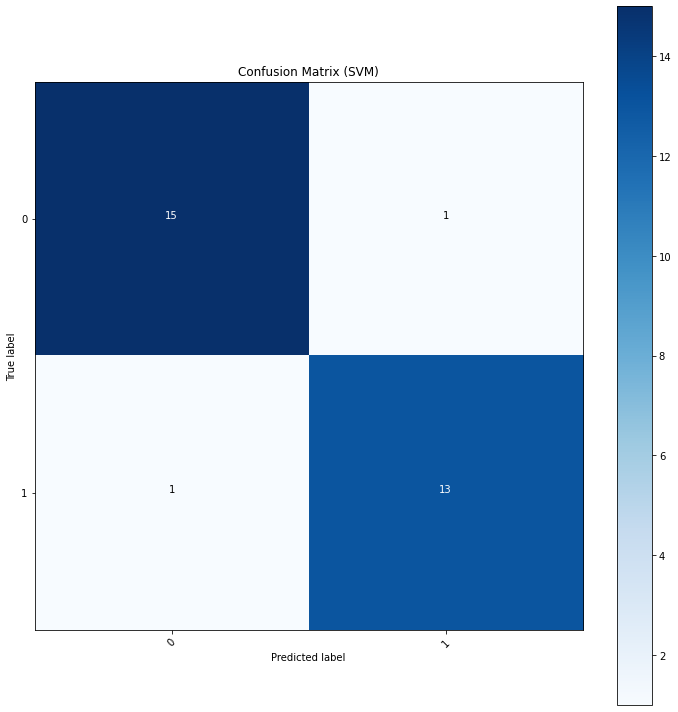

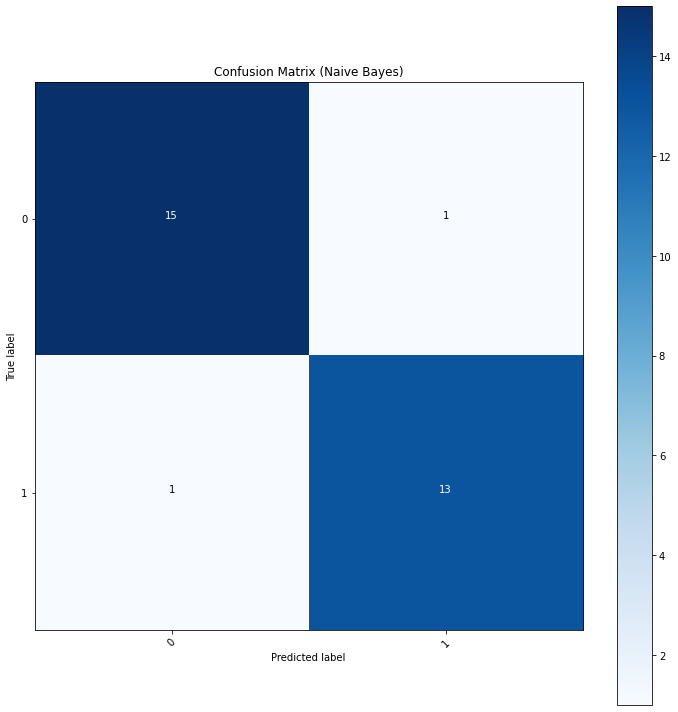

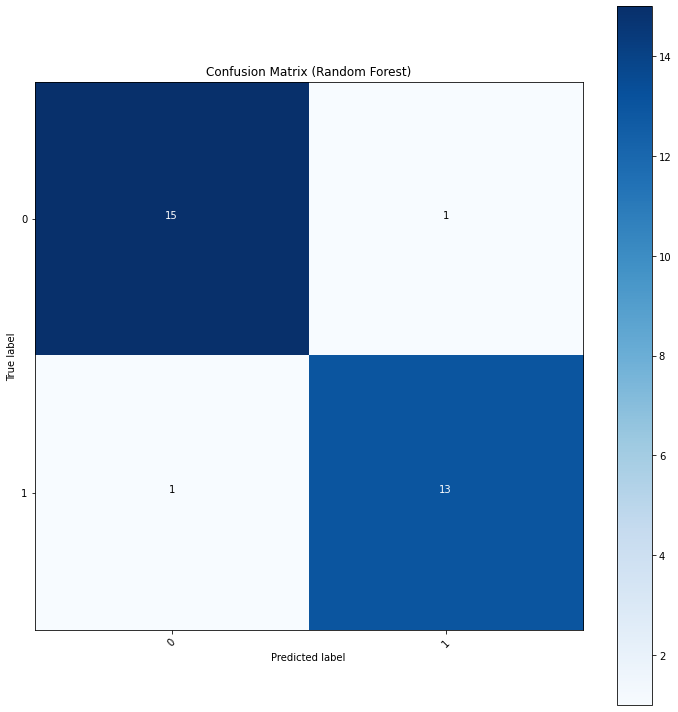

In [125]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for each test set
y_tests = [y_test_1, y_test_1, y_test_1, y_test_1]
y_preds = [y_pred_logreg_1, y_pred_svm_1, y_pred_gnb_1, y_pred_rf_1]
cnfs = [confusion_matrix(y_test, y_pred) for y_test, y_pred in zip(y_tests, y_preds)]

# Plot the confusion matrices
for cnf, model in zip(cnfs, models):
    plt.figure()
    plt.rcParams["figure.figsize"] = (10,10)
    plot_confusion_matrix(cnf, classes=np.unique(y_test), title=f'Confusion Matrix ({model})')
    plt.show()

## Version 2

Logistic Regression Statistics:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1-score: 0.9667
Confusion Matrix: 
[[15  1]
 [ 0 14]]



<Figure size 2160x1080 with 0 Axes>

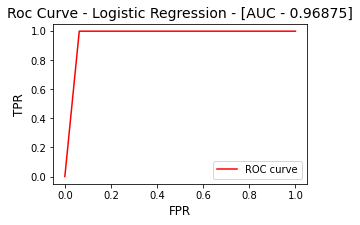

SVM Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

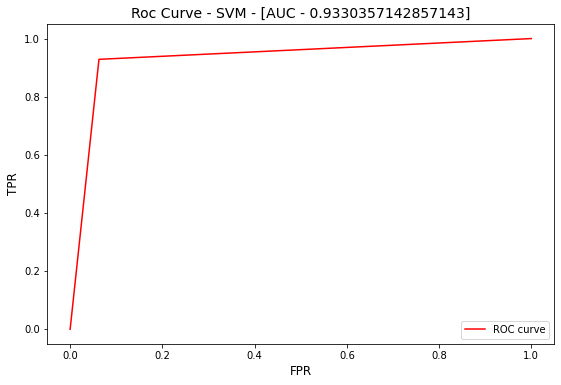

Naive Bayes Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

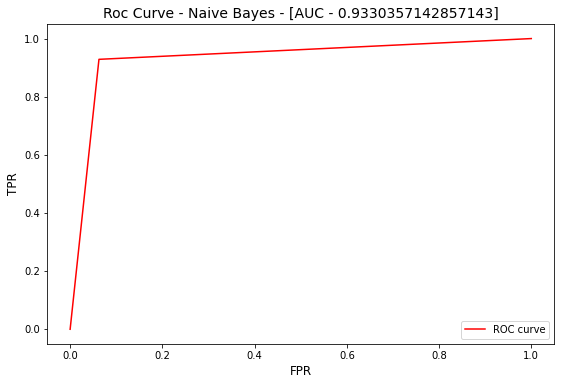

Random Forest Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

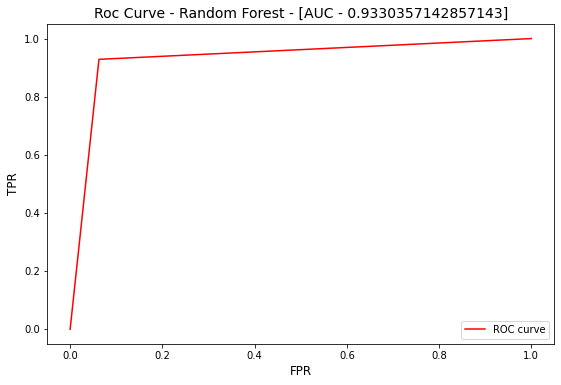

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
y_tests = [y_test_2, y_test_2, y_test_2, y_test_2]
y_preds = [y_pred_logreg_2, y_pred_svm_2, y_pred_gnb_2, y_pred_rf_2]

for model, y_test, y_pred in zip(models, y_tests, y_preds):
    print(f'{model} Statistics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')

          # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(30, 15))
    plt.suptitle("ROC Curves")
    plot_index = 1
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve - {model} - [AUC - {roc_auc}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,20)
    plt.show()

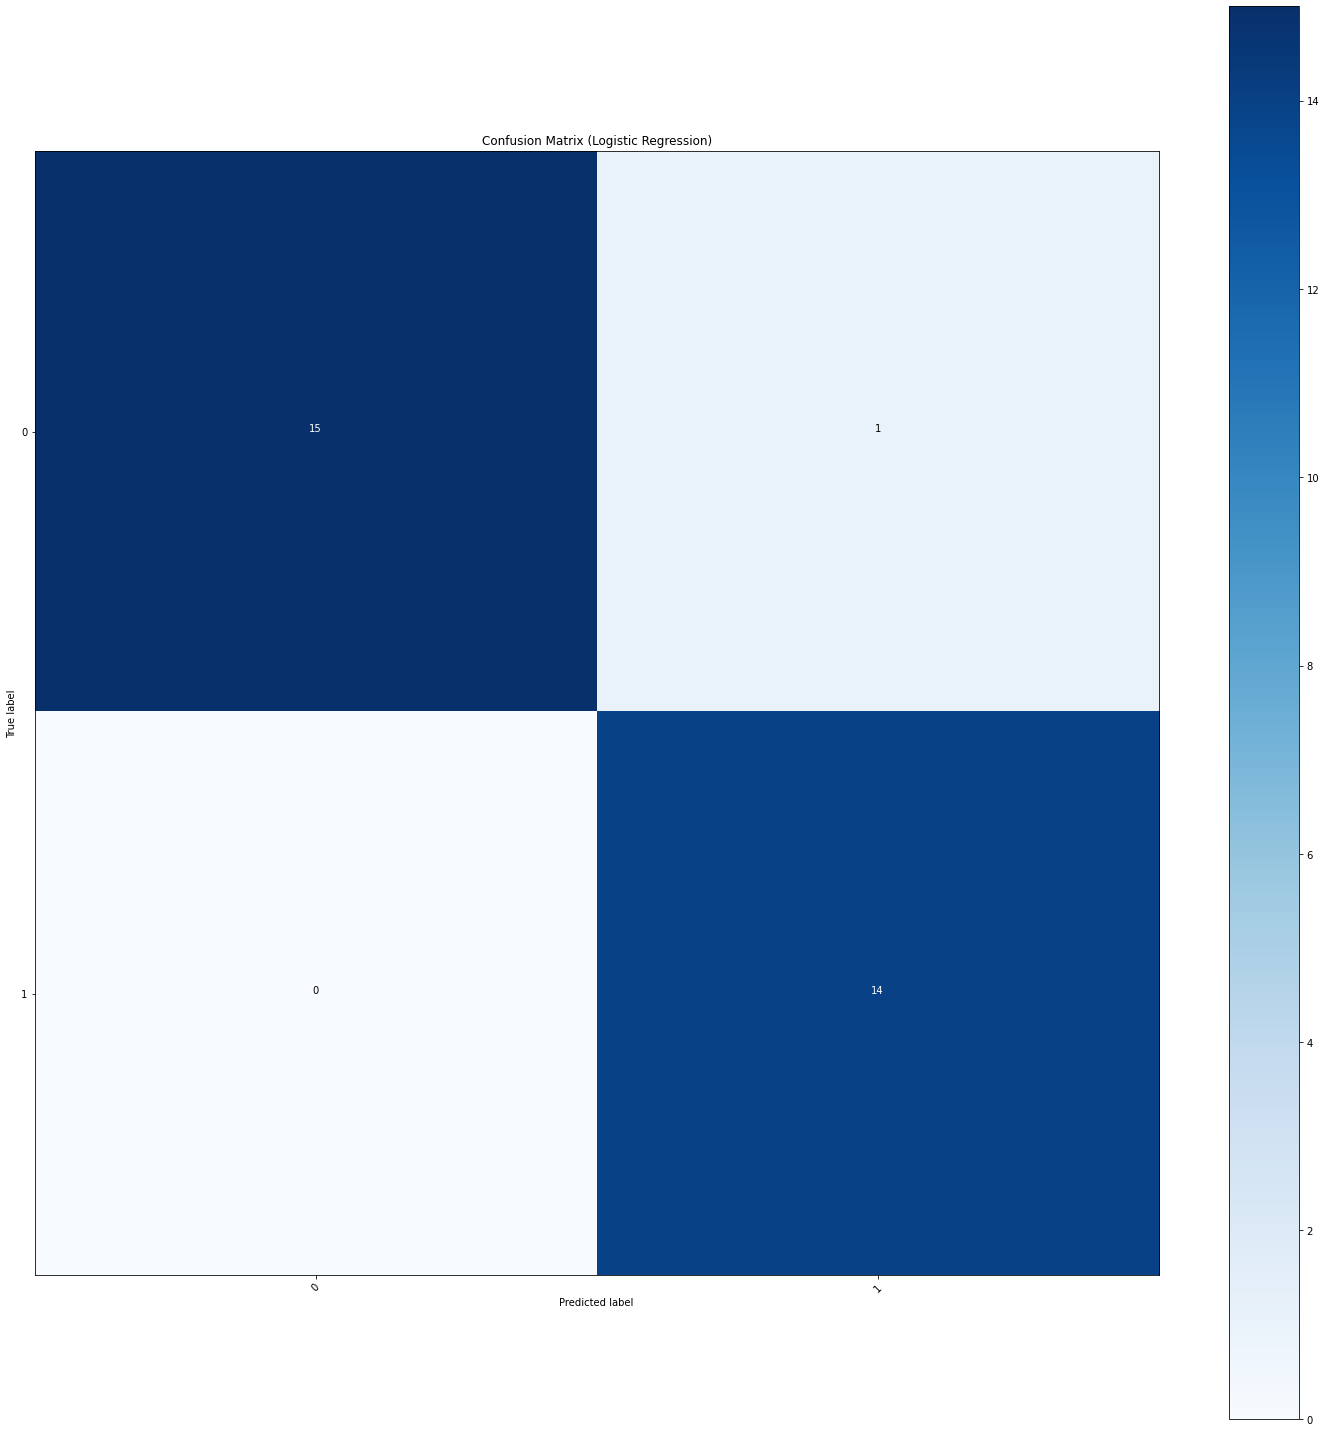

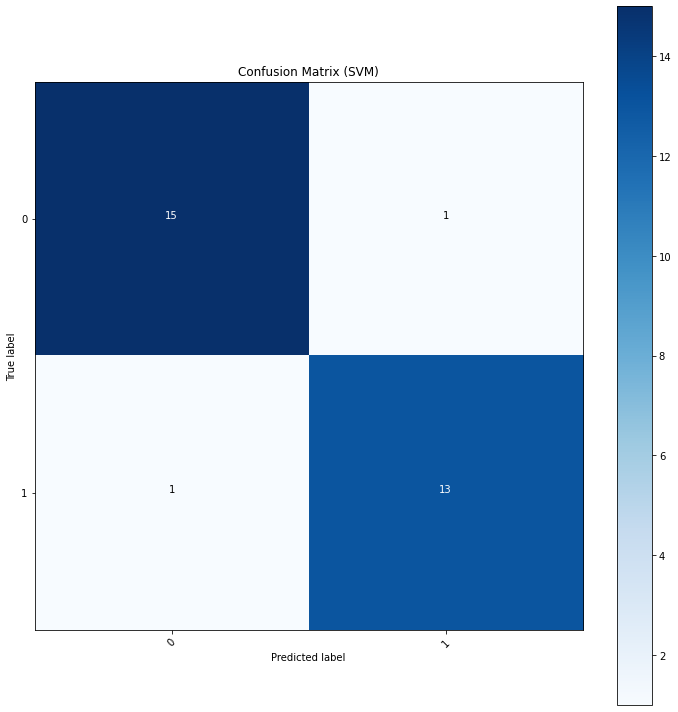

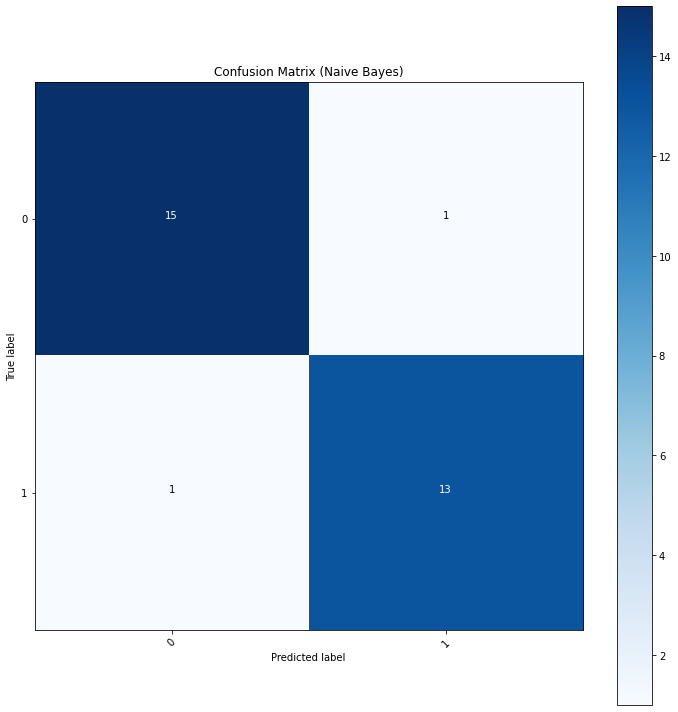

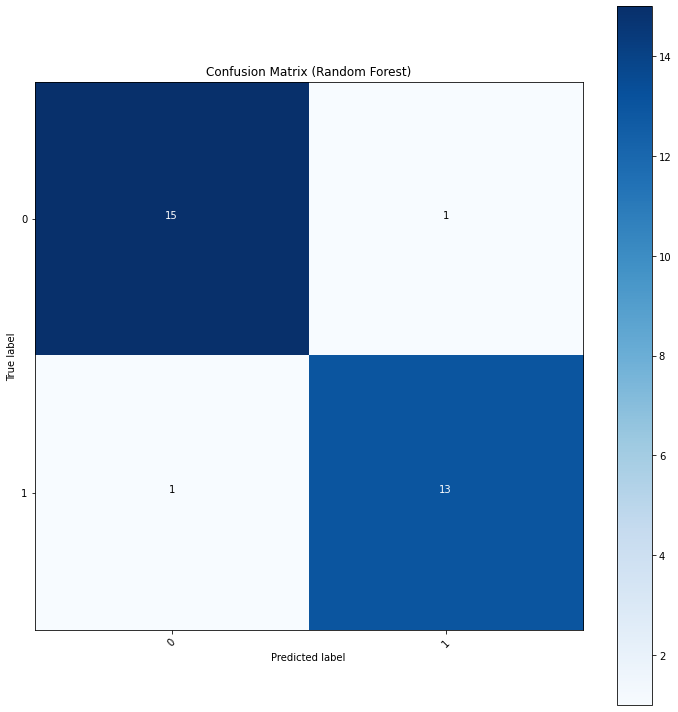

In [127]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for each test set
y_tests = [y_test_2, y_test_2, y_test_2, y_test_2]
y_preds = [y_pred_logreg_2, y_pred_svm_2, y_pred_gnb_2, y_pred_rf_2]
cnfs = [confusion_matrix(y_test, y_pred) for y_test, y_pred in zip(y_tests, y_preds)]

# Plot the confusion matrices
for cnf, model in zip(cnfs, models):
    plt.figure()
    plt.rcParams["figure.figsize"] = (10,10)
    plot_confusion_matrix(cnf, classes=np.unique(y_test), title=f'Confusion Matrix ({model})')
    plt.show()

## Version 3

Logistic Regression Statistics:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1-score: 0.9667
Confusion Matrix: 
[[15  1]
 [ 0 14]]



<Figure size 2160x1080 with 0 Axes>

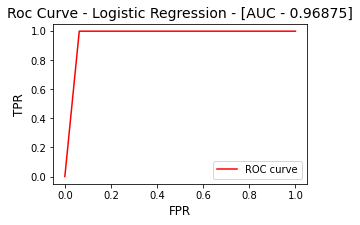

SVM Statistics:
Accuracy: 0.5000
Precision: 0.5120
Recall: 0.5000
F1-score: 0.4916
Confusion Matrix: 
[[ 6 10]
 [ 5  9]]



<Figure size 2160x1080 with 0 Axes>

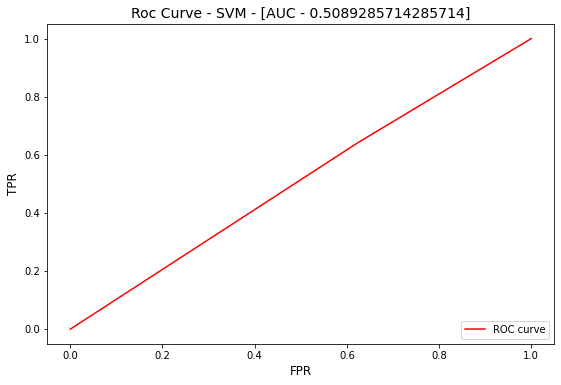

Naive Bayes Statistics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-score: 0.9333
Confusion Matrix: 
[[15  1]
 [ 1 13]]



<Figure size 2160x1080 with 0 Axes>

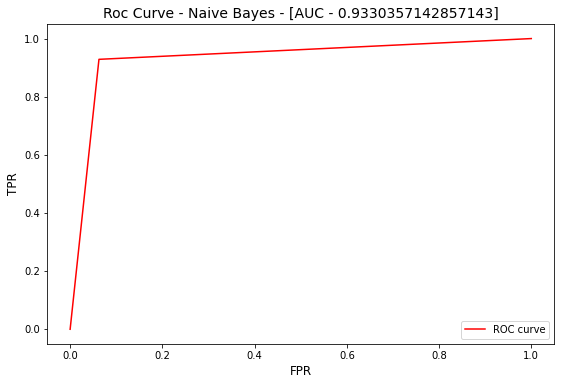

Random Forest Statistics:
Accuracy: 0.4333
Precision: 0.4223
Recall: 0.4333
F1-score: 0.4236
Confusion Matrix: 
[[ 9  7]
 [10  4]]



<Figure size 2160x1080 with 0 Axes>

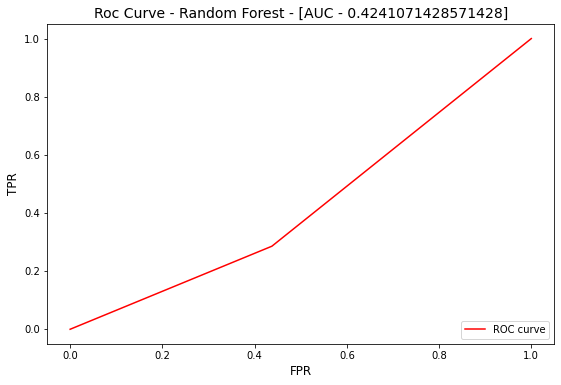

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
y_tests = [y_test_3, y_test_3, y_test_3, y_test_3]
y_preds = [y_pred_logreg_3, y_pred_svm_3, y_pred_gnb_3, y_pred_rf_3]

for model, y_test, y_pred in zip(models, y_tests, y_preds):
    print(f'{model} Statistics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')

          # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(30, 15))
    plt.suptitle("ROC Curves")
    plot_index = 1
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve - {model} - [AUC - {roc_auc}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,20)
    plt.show()

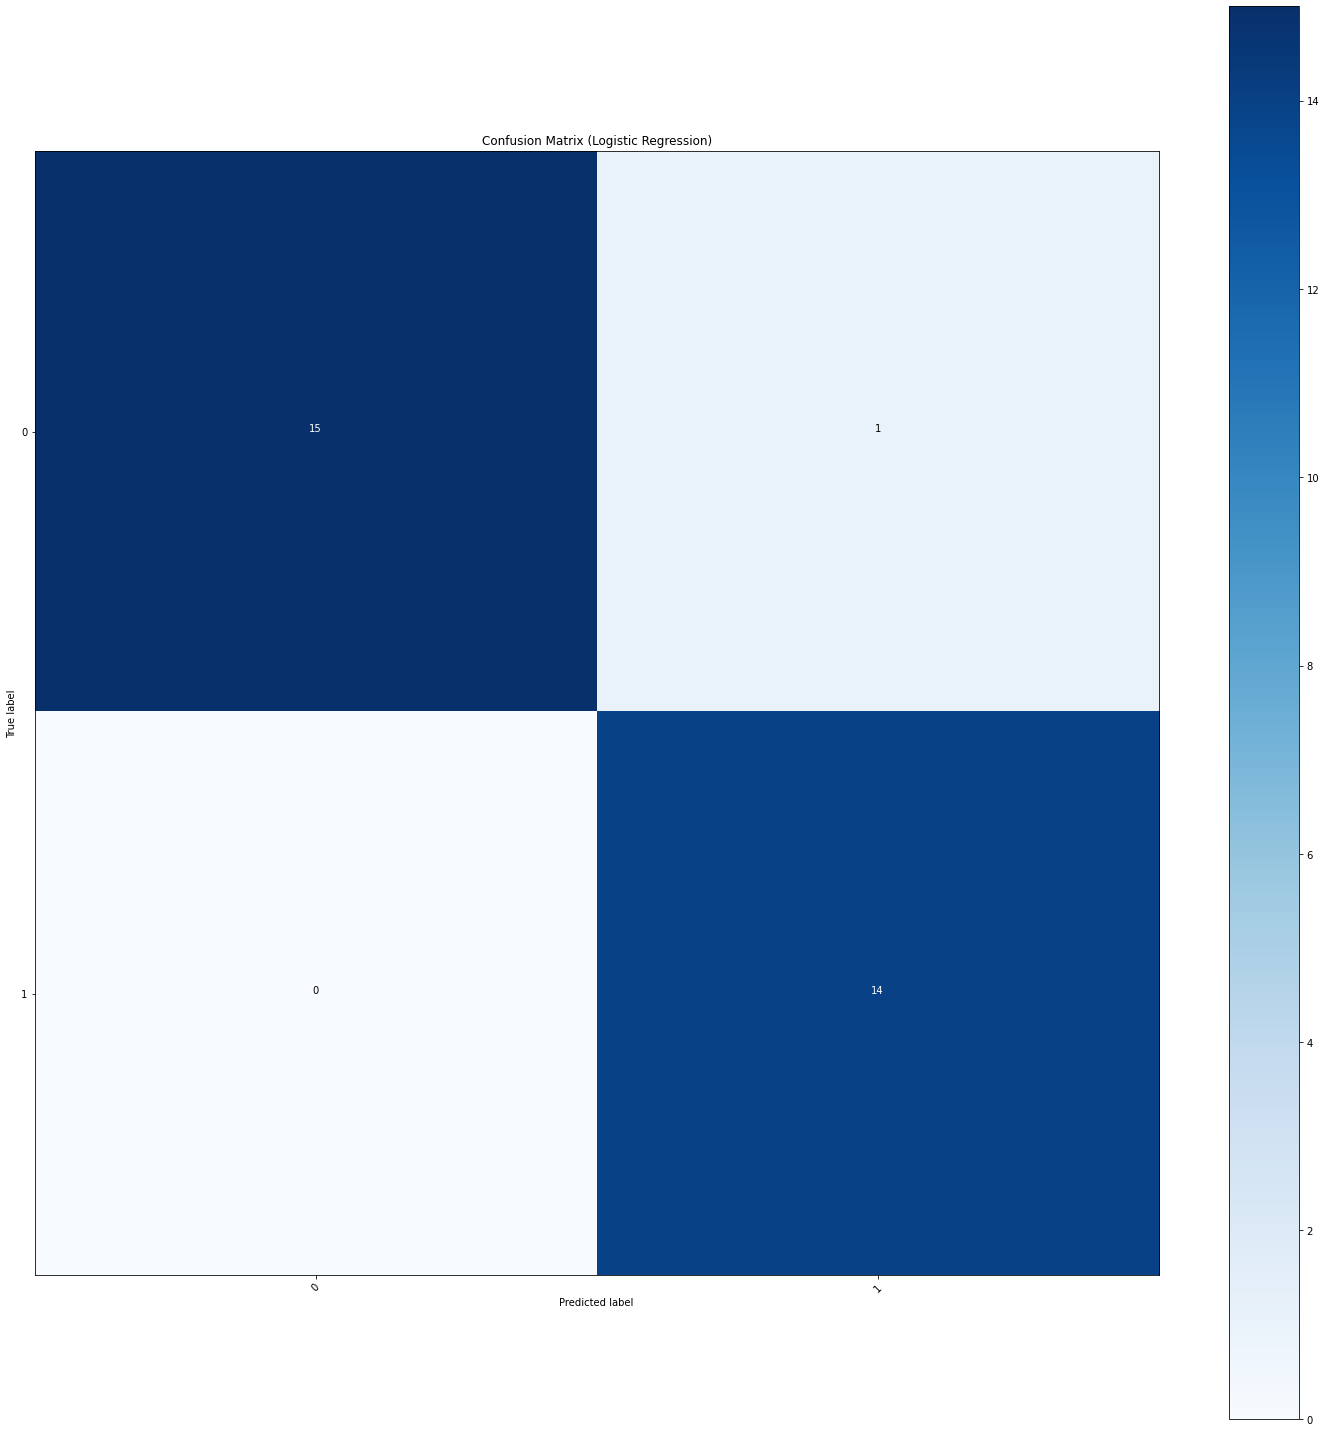

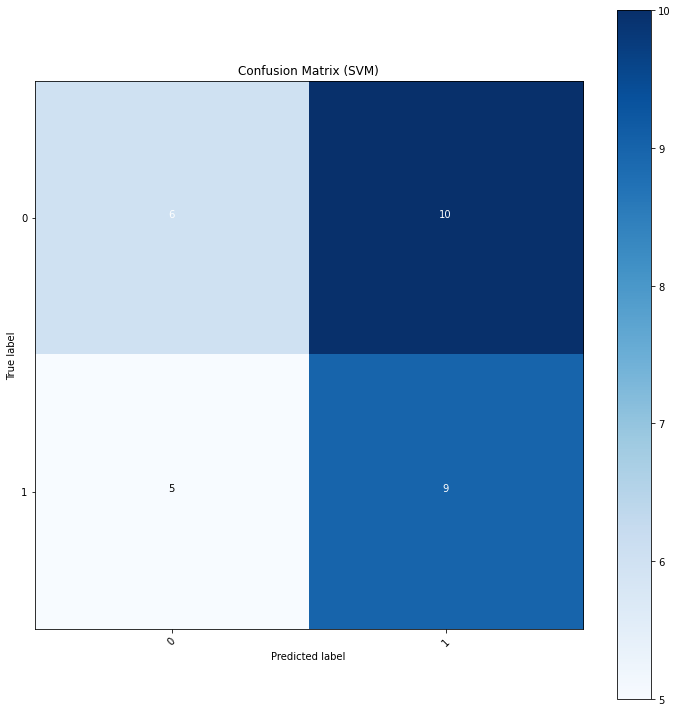

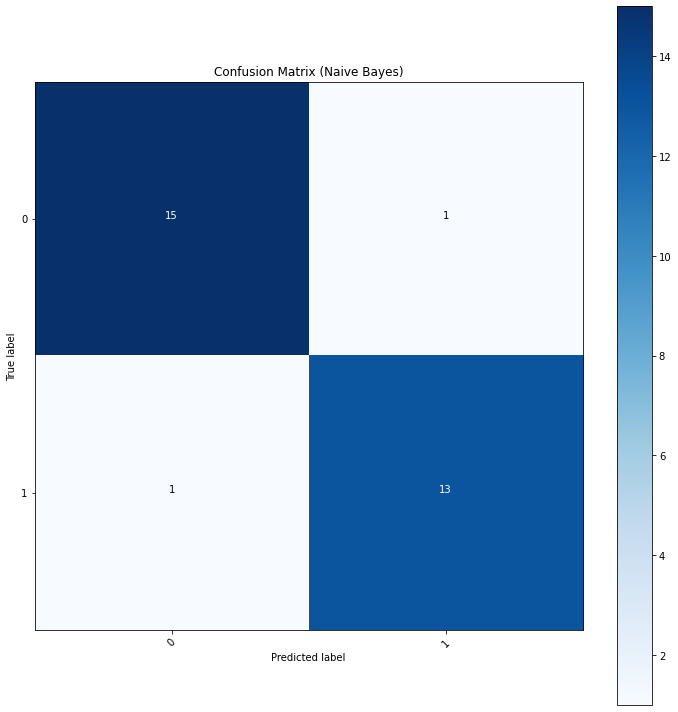

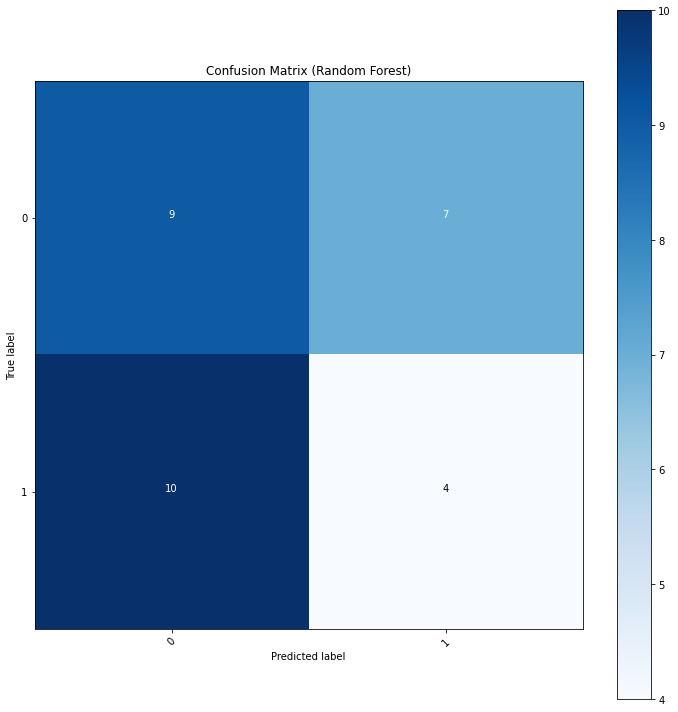

In [142]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for each test set
y_tests = [y_test_3, y_test_3, y_test_3, y_test_3]
y_preds = [y_pred_logreg_3, y_pred_svm_3, y_pred_gnb_3, y_pred_rf_3]
cnfs = [confusion_matrix(y_test, y_pred) for y_test, y_pred in zip(y_tests, y_preds)]

# Plot the confusion matrices
for cnf, model in zip(cnfs, models):
    plt.figure()
    plt.rcParams["figure.figsize"] = (10,10)
    plot_confusion_matrix(cnf, classes=np.unique(y_test), title=f'Confusion Matrix ({model})')
    plt.show()

## Results Comparison

Logisitcal Regression

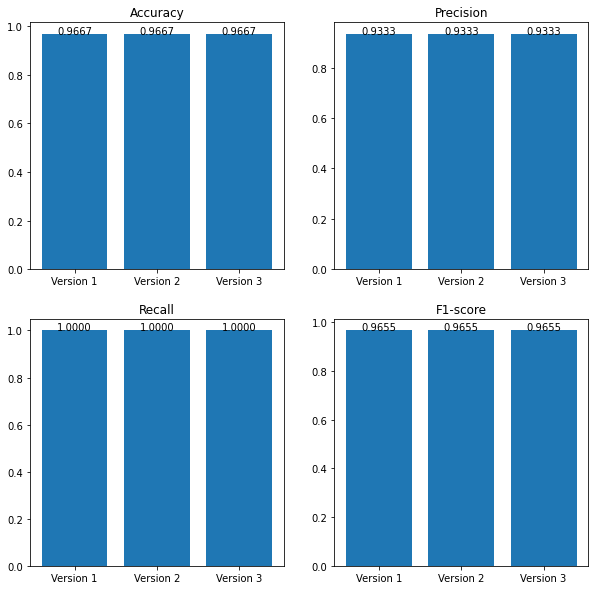

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the lists of test labels and predicted labels
y_tests = [y_test_1, y_test_2, y_test_3]
y_preds = [y_pred_logreg_1, y_pred_logreg_2, y_pred_logreg_3]

# Calculate the accuracy, precision, recall, and F1-score for each model
accuracies = [accuracy_score(y_tests[i], y_preds[i]) for i in range(3)]
precisions = [precision_score(y_tests[i], y_preds[i]) for i in range(3)]
recalls = [recall_score(y_tests[i], y_preds[i]) for i in range(3)]
f1_scores = [f1_score(y_tests[i], y_preds[i]) for i in range(3)]

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(['Version 1', 'Version 2', 'Version 3'], accuracies)
axs[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracies):
    axs[0, 0].text(i, v, f'{v:.4f}', ha='center')
axs[0, 1].bar(['Version 1', 'Version 2', 'Version 3'], precisions)
axs[0, 1].set_title('Precision')
for i, v in enumerate(precisions):
    axs[0, 1].text(i, v, f'{v:.4f}', ha='center')
axs[1, 0].bar(['Version 1', 'Version 2', 'Version 3'], recalls)
axs[1, 0].set_title('Recall')
for i, v in enumerate(recalls):
    axs[1, 0].text(i, v, f'{v:.4f}', ha='center')
axs[1, 1].bar(['Version 1', 'Version 2', 'Version 3'], f1_scores)
axs[1, 1].set_title('F1-score')
for i, v in enumerate(f1_scores):
    axs[1, 1].text(i, v, f'{v:.4f}', ha='center')
plt.show()


SVM

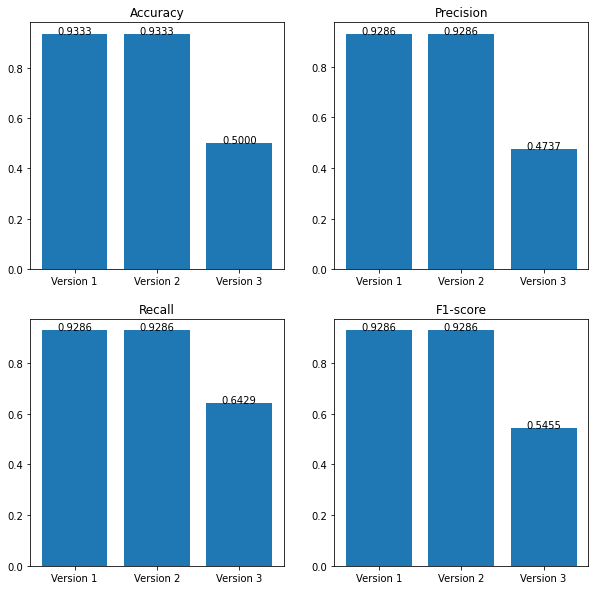

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the lists of test labels and predicted labels
y_tests = [y_test_1, y_test_2, y_test_3]
y_preds = [y_pred_svm_1, y_pred_svm_2, y_pred_svm_3]

# Calculate the accuracy, precision, recall, and F1-score for each model
accuracies = [accuracy_score(y_tests[i], y_preds[i]) for i in range(3)]
precisions = [precision_score(y_tests[i], y_preds[i]) for i in range(3)]
recalls = [recall_score(y_tests[i], y_preds[i]) for i in range(3)]
f1_scores = [f1_score(y_tests[i], y_preds[i]) for i in range(3)]

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(['Version 1', 'Version 2', 'Version 3'], accuracies)
axs[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracies):
    axs[0, 0].text(i, v, f'{v:.4f}', ha='center')
axs[0, 1].bar(['Version 1', 'Version 2', 'Version 3'], precisions)
axs[0, 1].set_title('Precision')
for i, v in enumerate(precisions):
    axs[0, 1].text(i, v, f'{v:.4f}', ha='center')
axs[1, 0].bar(['Version 1', 'Version 2', 'Version 3'], recalls)
axs[1, 0].set_title('Recall')
for i, v in enumerate(recalls):
    axs[1, 0].text(i, v, f'{v:.4f}', ha='center')
axs[1, 1].bar(['Version 1', 'Version 2', 'Version 3'], f1_scores)
axs[1, 1].set_title('F1-score')
for i, v in enumerate(f1_scores):
    axs[1, 1].text(i, v, f'{v:.4f}', ha='center')
plt.show()


Naive Bayes

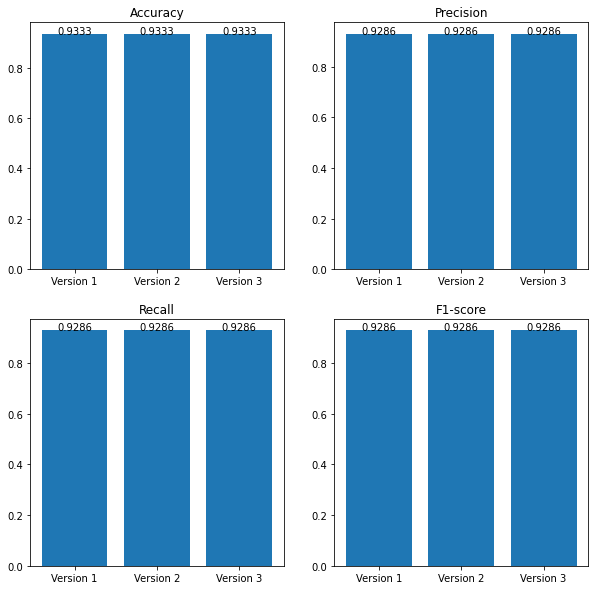

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the lists of test labels and predicted labels
y_tests = [y_test_1, y_test_2, y_test_3]
y_preds = [y_pred_gnb_1, y_pred_gnb_2, y_pred_gnb_3]

# Calculate the accuracy, precision, recall, and F1-score for each model
accuracies = [accuracy_score(y_tests[i], y_preds[i]) for i in range(3)]
precisions = [precision_score(y_tests[i], y_preds[i]) for i in range(3)]
recalls = [recall_score(y_tests[i], y_preds[i]) for i in range(3)]
f1_scores = [f1_score(y_tests[i], y_preds[i]) for i in range(3)]

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(['Version 1', 'Version 2', 'Version 3'], accuracies)
axs[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracies):
    axs[0, 0].text(i, v, f'{v:.4f}', ha='center')
axs[0, 1].bar(['Version 1', 'Version 2', 'Version 3'], precisions)
axs[0, 1].set_title('Precision')
for i, v in enumerate(precisions):
    axs[0, 1].text(i, v, f'{v:.4f}', ha='center')
axs[1, 0].bar(['Version 1', 'Version 2', 'Version 3'], recalls)
axs[1, 0].set_title('Recall')
for i, v in enumerate(recalls):
    axs[1, 0].text(i, v, f'{v:.4f}', ha='center')
axs[1, 1].bar(['Version 1', 'Version 2', 'Version 3'], f1_scores)
axs[1, 1].set_title('F1-score')
for i, v in enumerate(f1_scores):
    axs[1, 1].text(i, v, f'{v:.4f}', ha='center')
plt.show()


Random Forest

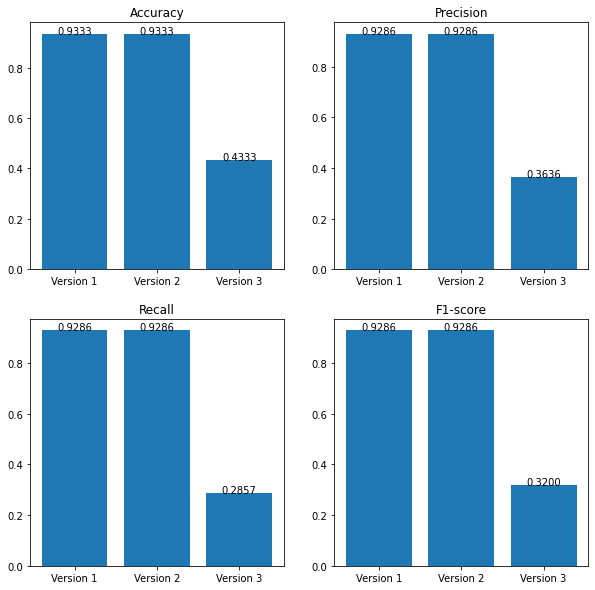

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the lists of test labels and predicted labels
y_tests = [y_test_1, y_test_2, y_test_3]
y_preds = [ y_pred_rf_1, y_pred_rf_2, y_pred_rf_3]

# Calculate the accuracy, precision, recall, and F1-score for each model
accuracies = [accuracy_score(y_tests[i], y_preds[i]) for i in range(3)]
precisions = [precision_score(y_tests[i], y_preds[i]) for i in range(3)]
recalls = [recall_score(y_tests[i], y_preds[i]) for i in range(3)]
f1_scores = [f1_score(y_tests[i], y_preds[i]) for i in range(3)]

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(['Version 1', 'Version 2', 'Version 3'], accuracies)
axs[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracies):
    axs[0, 0].text(i, v, f'{v:.4f}', ha='center')
axs[0, 1].bar(['Version 1', 'Version 2', 'Version 3'], precisions)
axs[0, 1].set_title('Precision')
for i, v in enumerate(precisions):
    axs[0, 1].text(i, v, f'{v:.4f}', ha='center')
axs[1, 0].bar(['Version 1', 'Version 2', 'Version 3'], recalls)
axs[1, 0].set_title('Recall')
for i, v in enumerate(recalls):
    axs[1, 0].text(i, v, f'{v:.4f}', ha='center')
axs[1, 1].bar(['Version 1', 'Version 2', 'Version 3'], f1_scores)
axs[1, 1].set_title('F1-score')
for i, v in enumerate(f1_scores):
    axs[1, 1].text(i, v, f'{v:.4f}', ha='center')
plt.show()


Best Results

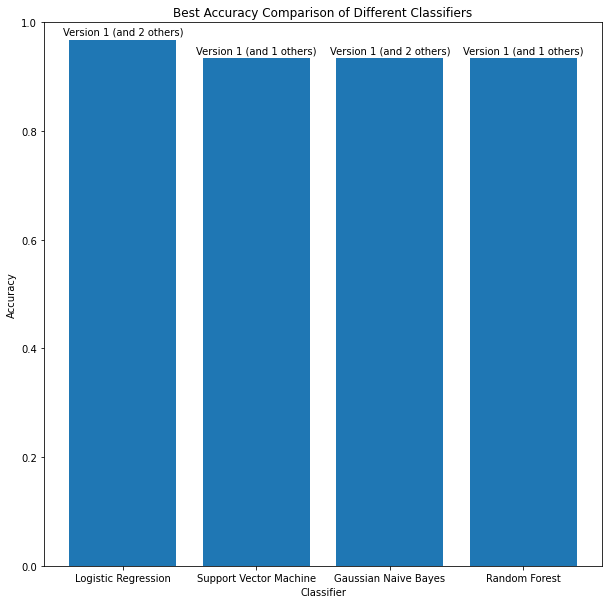

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

classifiers = ['Logistic Regression', 'Support Vector Machine', 'Gaussian Naive Bayes', 'Random Forest']
preds = [[y_pred_logreg_1, y_pred_logreg_2, y_pred_logreg_3],
         [y_pred_svm_1, y_pred_svm_2, y_pred_svm_3],
         [y_pred_gnb_1, y_pred_gnb_2, y_pred_gnb_3],
         [y_pred_rf_1, y_pred_rf_2, y_pred_rf_3]]
accuracies = []
best_models = {}

for i in range(len(classifiers)):
    clf_accs = [accuracy_score(y_tests[j], preds[i][j]) for j in range(len(y_tests))]
    best_acc = max(clf_accs)
    best_models[i] = [j+1 for j in range(len(clf_accs)) if clf_accs[j] == best_acc]
    accuracies.append(best_acc)

plt.bar(classifiers, accuracies)
plt.ylim([0, 1])
plt.title('Best Accuracy Comparison of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

for i, v in enumerate(best_models.values()):
    text = f'Version {v[0]}'
    if len(v) > 1:
        text += f' (and {len(v)-1} others)'
    plt.text(i, accuracies[i]+0.01, text, ha='center')

plt.show()


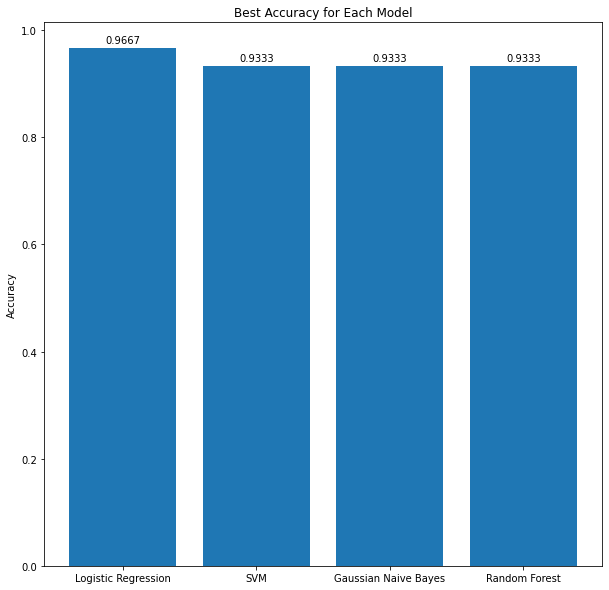

In [148]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the y tests for each model
y_tests = [y_test_1, y_test_2, y_test_3]

# Define the predicted values for each model
y_preds = [[y_pred_logreg_1, y_pred_logreg_2, y_pred_logreg_3],
           [y_pred_svm_1, y_pred_svm_2, y_pred_svm_3],
           [y_pred_gnb_1, y_pred_gnb_2, y_pred_gnb_3],
           [y_pred_rf_1, y_pred_rf_2, y_pred_rf_3]]

# Calculate the best accuracy for each model
best_accuracies = [max([accuracy_score(y_tests[i], y_preds[j][i]) for i in range(len(y_tests))]) for j in range(len(y_preds))]

# Plot the best accuracies for each model
labels = ['Logistic Regression', 'SVM', 'Gaussian Naive Bayes', 'Random Forest']
x_pos = np.arange(len(labels))
plt.bar(x_pos, best_accuracies)
plt.xticks(x_pos, labels)
plt.ylabel('Accuracy')
plt.title('Best Accuracy for Each Model')
for i in range(len(x_pos)):
    plt.text(x_pos[i], best_accuracies[i]+0.01, "{:.4f}".format(best_accuracies[i]), ha='center')
plt.show()